<font size="+3" color=red><b> <center><u> Indian Premier League (IPL) 🏏 Analysis (2020) </u></center></b></font>

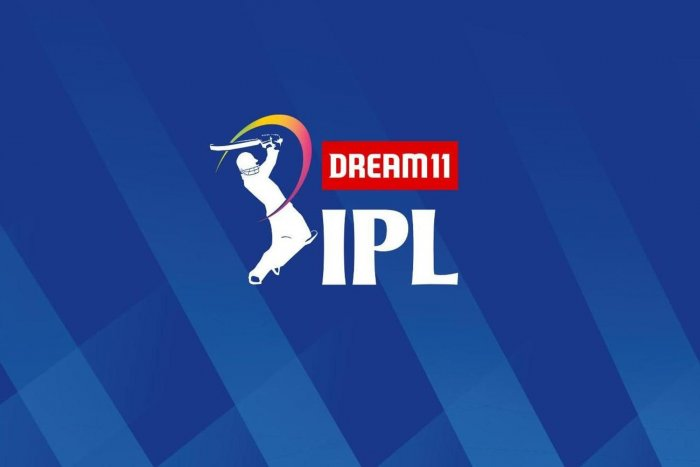

## SUBMITTED BY 
- RAJAT MONGIA (RA1911031010111)
- SANGIREDDY SANJEEVA KUMAR REDDY (RA1911003010532)
- AAKASH KAUSHIK (RA1911032010001)
- SAMBUDDHA DAS (RA1911031010109)

<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>Objective  </center></h2>

Goal of this kernel is following:
- Basic Exploratory Data Analysis.
- Feature Analysis

<a id="1"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Introduction  </center></h2>

<a id="1.1"></a>
<font color="blue" size=+2.5><b> Introduction </b></font>

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.

<a id="2"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Load and Check Data  </center></h2>

<a id="2.1"></a>
<font color="blue" size=+2.5><b> Import Libraries </b></font>


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
from pywaffle import Waffle 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

import random

In [10]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

<a id="2.2"></a>
<font color="blue" size=+2.5><b> Import Dataset </b></font>


In [11]:
deliveries = pd.read_csv('IPL Matches 2008-2020.csv')
matches = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

Let's inspect the `matches` data before stepping into the concepts

In [12]:
print(f'Number of rows    = {len(matches)}')
print(f'Number of columns = {len(matches.columns)}')


Number of rows    = 193468
Number of columns = 18


In [13]:
matches.head()

id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
0             1           0           1             0          0   
1             1           0           1             0          0   
2             0           0           0             0          0   
3             1           0           1             0          0   
4             1           0           1             0          0   

  dismissal_kind player_dismissed fielder extras_type           batting_team  \
0            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
1            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
2            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
3            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
4            NaN              NaN     NaN         NaN  Kolkata Knight Riders   

                  bowling_team  
0  Royal Challengers Bangalore  
1  Royal Challengers Bangalore  
2  Royal Challengers Bangalore  
3  Royal Challengers Bangalore  
4  Royal Challengers Bangalore

Let's inspect the `deliveries` data before stepping into the concepts

In [14]:
print(f'Number of rows    = {len(deliveries)}')
print(f'Number of columns = {len(deliveries.columns)}')


Number of rows    = 816
Number of columns = 17


In [15]:
deliveries.head()

id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator method    umpire1         umpire2  
0     runs          140.0          N    NaN  Asad Rauf     RE Koertzen  
1     runs           33.0          N    NaN  MR Benson      SL Shastri  
2  wickets            9.0          N    NaN  Aleem Dar  GA Pratapkumar  
3  wickets            5.0          N    NaN   SJ Davis       DJ Harper  
4  wickets            5.0          N    NaN  BF Bowden     K Hariharan

<a id="2.2"></a>
<font color="blue" size=+2.5><b> Data Cleaning </b></font>

In [16]:
matches.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [17]:
matches.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [18]:
deliveries.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [19]:
deliveries.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [20]:
print(deliveries['winner'].unique())
print(deliveries['city'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI Punjab'
 'Deccan Chargers' 'Mumbai Indians' 'Pune Warriors' 'Kochi Tuskers Kerala'
 nan 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals']
['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


In [21]:
deliveries.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
deliveries.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
deliveries.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
deliveries.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [22]:
deliveries.replace('Bangalore','Bengaluru', inplace = True)

In [23]:
#fill missing values
deliveries['city'].fillna(deliveries['venue'], inplace = True)
deliveries['winner'].fillna(deliveries['result'], inplace = True)
deliveries['player_of_match'].fillna(deliveries['result'], inplace = True)
deliveries['umpire1'].fillna('unknown', inplace = True)
deliveries['umpire2'].fillna('unknown', inplace = True)

<a id="4"></a>
<font color="blue" size=+2.5><b> Total number of matches till 2020</b></font>

In [24]:
deliveries["season"] = deliveries["date"].apply(lambda x:x.split("-")[0])

In [25]:
seasons_data = deliveries["season"].value_counts()
total_matches = deliveries.groupby('season')['id'].count()
data = [go.Bar(
    x = seasons_data.index,
    y = seasons_data.values,
    marker = dict(color = random_colors(len(seasons_data.index)),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(
   {
      "title":"Total number of matches till 2020 (2008-2019)",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="5"></a>
<font color="blue" size=+2.5><b> Total number of matches Win by Each Teams</b></font>

In [26]:
data = [go.Bar(
    x = deliveries['winner'].value_counts().index,
    y = deliveries['winner'].value_counts().values,
    marker = dict(color = random_colors(len(deliveries['winner'].value_counts().index)),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(
   {
      "title":"Total number of wins by each team till 2020",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)


<a id="6"></a>
<font color="blue" size=+2.5><b>Does toss winning affects the match winner ?</b></font>

In [27]:
trace1 = go.Bar(x=deliveries["winner"].value_counts().index, y=deliveries["winner"].value_counts().values,name="match win")
trace2 = go.Bar(x=deliveries["toss_winner"].value_counts().index, y=deliveries["toss_winner"].value_counts().values,name="toss win")

# Fill out  data with our traces
data = [trace1, trace2]
# Create layout and specify title, legend and so on


layout = go.Layout(title="Total number of wins for every team till 2020",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of Matches"),
                   legend=dict(x=1.0, y=0.5)
                   ,barmode="group")


# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

<a id="7"></a>
<font color="blue" size=+2.5><b>Toss/Win Ratio</b></font>

In [28]:
Total_matches_played = deliveries['team1'].value_counts() + deliveries['team2'].value_counts()

toss_won = deliveries['toss_winner'].value_counts()
toss_win_success_rate = (toss_won/Total_matches_played)*100
toss_win_success_rate_sort = toss_win_success_rate.sort_values(ascending = False)
toss_win_success_rate_sort

data = [go.Bar(
    x = toss_win_success_rate.sort_values(ascending=False).index,
    y = toss_win_success_rate.sort_values(ascending=False).values,
    marker = dict(color = random_colors(len(toss_win_success_rate.sort_values(ascending=False).index)),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(title="Toss Win success ratio.",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of Matches"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

<a id="8"></a>
<font color="blue" size=+2.5><b>Do you know who won the most player of the match?</b></font>

In [29]:
data = [go.Bar(
    x = deliveries['player_of_match'].value_counts()[:20].index,
    y = deliveries['player_of_match'].value_counts()[:20].values,
    marker = dict(color = random_colors(20),line=dict(color='#000000', width=1.5))
)]


layout = go.Layout(title="Total number of Player of the match. ",
                   xaxis=dict(title="Name of the top 20 Player of the match."),
                   yaxis=dict(title="Number of Player of the match"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)


<a id="9"></a>
<font color="blue" size=+2.5><b>Success rate of winning matches</b></font>


In [30]:
matches_won = deliveries.groupby('winner').count()
total_matches = deliveries['team1'].value_counts() + deliveries['team2'].value_counts()

matches_won['Total matches'] = total_matches
win_df = matches_won[["Total matches","result"]]
success_ratio = round((matches_won['id']/total_matches),4)*100
success_ratio_sort = success_ratio.sort_values(ascending = False)

data = [go.Bar(
    x = success_ratio_sort.index,
    y = success_ratio_sort.values,
    marker = dict(color = random_colors(len(success_ratio_sort.index)),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(title="Success rate of Teams",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Success rate of wining"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

<a id="10"></a>
<font color="blue" size=+2.5><b> Most Titles Wins </b></font>

In [31]:
each_season_winner = deliveries.groupby('season')['season','winner'].tail(1)
each_season_winner_sort = each_season_winner.sort_values('season',ascending = True)

data = [go.Bar(
    x = each_season_winner_sort["winner"].value_counts().index,
    y = each_season_winner_sort["winner"].value_counts().values,
    marker = dict(color = random_colors(len(each_season_winner_sort["winner"].value_counts().index)),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(title="Most Titles Wins",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of seasons won by any team."))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

C:\Users\Sanju\AppData\Local\Temp\ipykernel_28992\3554828700.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<a id="11"></a>
<font color="blue" size=+2.5><b>Top 10 Playes with Most Runs</b></font>

In [32]:
batting_tot=matches.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 

data = [go.Bar(
    x = top_batsmen.batsman,
    y = top_batsmen.Runs,
    marker = dict(color = random_colors(10),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(title="Top 10 Batsmen in IPL- Seasons till 2020",
                   xaxis=dict(title="Top 10 Batsmen"),
                   yaxis=dict(title="Runs Scored"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

<a id="12"></a>
<font color="blue" size=+2.5><b>Top 10 Best Performances in a match</b></font>


In [33]:
batting_ings=matches.groupby(['id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10] 
batsman_ball_faced=matches.groupby(['id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['id','batsman'],right_on=['id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,matches,how='inner',left_on=['id','batsman'],right_on=['id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']

trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'markers',
    name="Strike Rate"
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'markers',
    name="Run"
)
layout = go.Layout(title="IPL Best batting performances in a Match",
                   xaxis=dict(title="Batsmen"),
                   yaxis=dict(title="Strike Rate/Innings Score"))


# Fill out  data with our traces
data = [trace1, trace2]

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

<a id="13"></a>
<font color="blue" size=+2.5><b>Top 10 bowlers till 2020</b></font>

In [34]:
bowling_wickets=matches[matches['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 

trace1 = go.Scatter(
    x = top_bowlers['bowler'].values,
    y = top_bowlers['Wickets'].values,
    mode = 'lines+markers',
)

layout = go.Layout(title="Top 10 Bowlers in IPL- Seasons 2008-2019",
                   xaxis=dict(title="TOP 10 Bowlers"),
                   yaxis=dict(title="Wickets Taken"))


# Fill out  data with our traces
data = [trace1]

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

<a id="14"></a>
<font color="blue" size=+2.5><b>Top 10 Bowling Performance till 2020</b></font>


In [35]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
match_bowling_tot=bowling_wickets.groupby(['id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['id','bowler','Wickets']][0:10] 
match_bowling_runs=matches.groupby(['id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['id','bowler'],right_on=['id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance,matches,how='inner',left_on=['id','bowler'],right_on=['id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']


trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'markers',
    name="Wickets"
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name="Run Per Wicket"
)

layout = go.Layout(title="IPL Best bowling performances in a Match",
                   xaxis=dict(title="Top Bowlers"),
                   yaxis=dict(title="Runs per Wicket/Wickets"))


# Fill out  data with our traces
data = [trace1, trace2]

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

<a id="15"></a>
<font color="blue" size=+2.5><b> Top 10 Cities by Number Of matches</b></font>


In [36]:
city_counts= deliveries.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
top_cities_order=city_counts.sort_values(by='Match Counts',ascending=False)
top_cities=top_cities_order[:10]

trace = go.Pie(labels = top_cities.city.values, values =top_cities["Match Counts"].values,
               marker=dict(colors = random_colors(10), 
                           line=dict(color='#000000', width=2)
                           ))
data = [trace]
layout = go.Layout(
   {
      "title":"Top Cities that have hosted IPL Matches",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="17"></a>
<font color="blue" size=+2.5><b> Results Based on Duckworth-Lewis </b></font>

*Duckworth-Lewis is based on the idea of compensating rain-affected teams for the loss of "run-scoring resources". The D/L method works on the basis that teams have two resources to make runs with: the number of overs to be bowled and the number of wickets in hand.*

In [37]:
deliveries["method"].fillna("Non D/L",inplace=True)
data = [go.Bar(
    x = deliveries["method"].value_counts().index.values,
    y = deliveries["method"].value_counts().values,
    marker = dict(color = random_colors(3),line=dict(color='#000000', width=2))
)]

layout = go.Layout(
   {
      "title":"Results Based on Duckworth-Lewis",
   }
)
fig = go.Figure(data=data,layout = layout)
iplot(fig)

trace = go.Pie(labels = deliveries["method"].value_counts().index.values, values = deliveries["method"].value_counts().values,
                            hole = 0.2,
               marker=dict(colors = random_colors(3), 
                           line=dict(color='#000000', width=2)
                           ))
data = [trace]
layout = go.Layout(
   {
      "title":"Results Based on Duckworth-Lewis",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="18"></a>
<font color="blue" size=+2.5><b>Top 10 Umpire to feature in max number of matches </b></font>

In [38]:
data = pd.DataFrame({"umpire":deliveries["umpire1"].tolist() + deliveries["umpire2"].tolist()},columns=['umpire'])
data = [go.Bar(
    x = data["umpire"].value_counts().index[:10],
    y = data["umpire"].value_counts().values[:10],
    marker = dict(color = random_colors(10),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
   {
      "title":"Top 10 Umpire to feature in max number of matches",
   }
)
fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="19"></a>
<font color="blue" size=+2.5><b> Season wise match summary of matches won by runs </b></font>

In [39]:
data = {"season":deliveries["season"], 
        "winsbyrun":deliveries[deliveries['result_margin']!=0]['result_margin']} 
df = pd.concat(data, 
               axis = 1) 

fig = px.strip(df, x="season", y="winsbyrun")
fig.show()

<a id="20"></a>
<font color="blue" size=+2.5><b> Top Most Dissmisal Reason </b></font>

In [40]:
data = [go.Bar(
    x = matches["dismissal_kind"].value_counts().index,
    y = matches["dismissal_kind"].value_counts().values,
    marker = dict(color = random_colors(len(matches["dismissal_kind"].value_counts().index)),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
   {
      "title":"Top Most Dismissal Kind",
   }
)
fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="21"></a>
<font color="blue" size=+2.5><b> Top 10 Best Fielders in the Field </b></font>

In [41]:
data = [go.Bar(
    x =matches["fielder"].value_counts().index[:10],
    y = matches["fielder"].value_counts().values[:10],
    marker = dict(color = random_colors(10),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
   {
      "title":"Top 10 Best Fielders in the Field ",
   }
)
fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="22"></a>
<font color="blue" size=+2.5><b> Toss Decision </b></font>

In [42]:
data = [go.Bar(
    x = deliveries["toss_decision"].value_counts().index,
    y = deliveries["toss_decision"].value_counts().values,
    marker = dict(color = random_colors(2),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
   {
      "title":"Most Likely Decision After Winning Toss",
   }
)
fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="23"></a>
<font color="blue" size=+2.5><b> Analysis Over by Over </b></font>

In [43]:
fig = go.Figure(
   data=[
       go.Scatter(
          x=matches.groupby(by='over').sum().index,
          y=matches.groupby(by='over').sum().total_runs.values,
          mode='lines'
       )
   ],
   layout=go.Layout(
       title='Total Runs'
   )
)
iplot(fig)

fig = go.Figure(
   data=[
       go.Scatter(
          x=matches.groupby(by='over').sum().index,
          y=matches.groupby(by='over').sum().is_wicket.values,
          mode='lines'
       )
   ],
   layout=go.Layout(
       title='Total Runs'
   )
)
iplot(fig)

fig = go.Figure(
   data=[
       go.Scatter(
          x=matches.groupby(by='over').sum().index,
          y=matches.groupby(by='over').sum().extra_runs.values,
          mode='lines'
       )
   ],
   layout=go.Layout(
       title='Total Runs'
   )
)
iplot(fig)

fig = go.Figure(
   data=[
       go.Scatter(
          x=matches.groupby(by='over').sum().index,
          y=matches.groupby(by='over').sum().batsman_runs.values,
          mode='lines'
       )
   ],
   layout=go.Layout(
       title='Total Runs'
   )
)
iplot(fig)